In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score

In [ ]:
data = pd.read_csv('abalone.csv',header=None,index_col=None)

In [ ]:
X = data.iloc[:, 0:7]
y = data.iloc[:, 7]

In [ ]:
ss=ShuffleSplit(n_splits=10, test_size=.20, random_state=0)
test=[]
train=[]
i = [1,2,3,4,5,6,7]
for j in i:
  test_accuracy,train_accuracy=[],[]
  dtr = DecisionTreeRegressor(max_depth=j)
  for train_index, test_index in ss.split(X):
    dtr.fit(X.iloc[train_index],y.iloc[train_index])
    train_accuracy.append(r2_score(dtr.predict(X.iloc[train_index])[:, np.newaxis],y.iloc[train_index]))
    y_predict=dtr.predict(X.iloc[test_index])[:, np.newaxis]
    test_accuracy.append(r2_score(y_predict, y.iloc[test_index]))
  test.append(np.mean(test_accuracy))
  train.append(np.mean(train_accuracy))

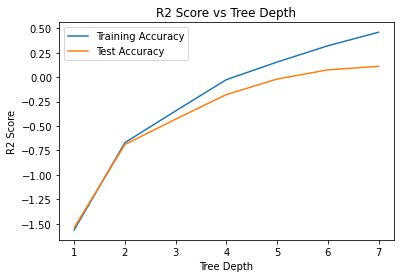

In [ ]:
plt.plot(i,train,label='Training Accuracy')
plt.plot(i,test,label='Test Accuracy')
plt.title("R2 Score vs Tree Depth")
plt.xlabel('Tree Depth')
plt.ylabel("R2 Score")
plt.legend()

In [ ]:
print(train)
print(test)

[-1.563341992099126, -0.6704266100710495, -0.34547513570163507, -0.025768569081397442, 0.15444515582160087, 0.321253129775905, 0.4597102112994801]
[-1.5392444271737478, -0.6892896148847634, -0.42980566141001064, -0.17822360925757902, -0.01899755903878726, 0.07472804306225711, 0.1111759868886493]
